22BAI1173\
21/12/2024\
Lab 2\
L39+L40

# Question 1
Load four images and crop specific regions from each.

##Import necessary libraries

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

##Cropping images

In [2]:
def load_and_crop_images(image_paths, crop_boxes):
    cropped_images = []
    for path, box in zip(image_paths, crop_boxes):
        #Read each image
        img = Image.open(path)
        #Crop each image according to the box given
        cropped = img.crop(box)
        #Add the cropped image to cropped_images list
        cropped_images.append(cropped)
    return cropped_images

##Loading 4 images

In [3]:
#Define the Image path
image_paths = ["/content/image01.png", "/content/image02.png", "/content/image03.png", "/content/image04.png"]
#Define the box size
crop_boxes = [
    (50, 50, 200, 200),
    (30, 30, 180, 180),
    (100, 100, 250, 250),
    (60, 60, 210, 210),
]
#Crop the image
cropped_images = load_and_crop_images(image_paths, crop_boxes)

##Plotting the original and cropped images

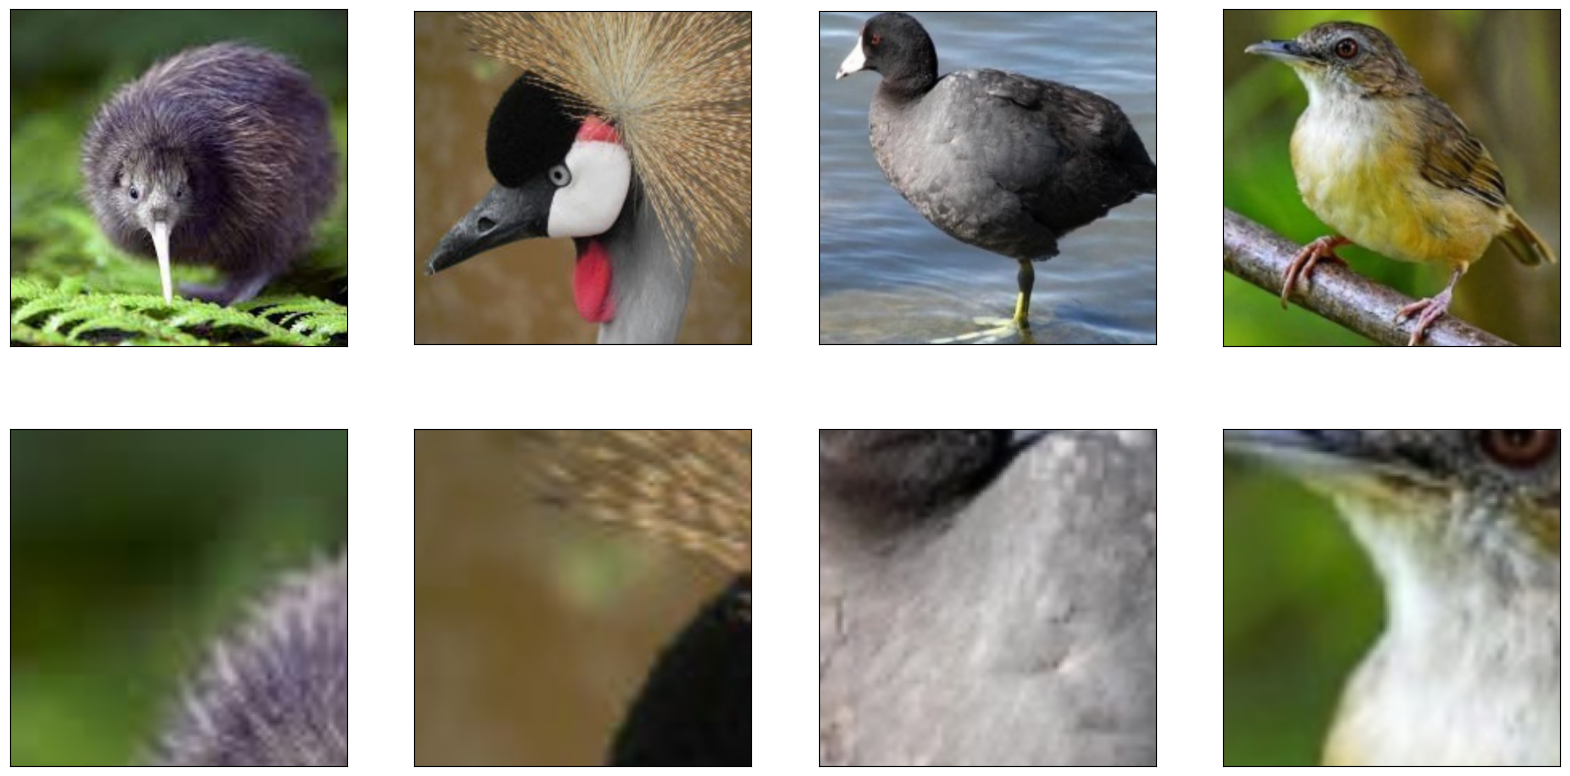

In [8]:
n=4
plt.figure(figsize=(20,10))
#Plot each image and its corresponding cropped image
for i in range(n):
  #Plotting the original image
  ax=plt.subplot(2,n,i+1)
  img=Image.open(image_paths[i])
  plt.imshow(img)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #Plotting the cropped image
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(cropped_images[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# Question 2
Arrange the cropped regions into a 2x2 grid to create a photo collage.

## Setting grid width and grid height

In [14]:
#Set grid size
grid_size=(2,2)

#Set grid height and width
img_width, img_height = cropped_images[0].size
grid_width = grid_size[1] * img_width
grid_height = grid_size[0] * img_height

##Combining images into grid

In [15]:
#Defining a new grid
grid = Image.new('RGB', (grid_width, grid_height))

#Adding all images to the new grid
for index, cropped_img in enumerate(cropped_images):
    row, col = divmod(index, grid_size[1])
    x = col * img_width
    y = row * img_height
    grid.paste(cropped_img, (x, y))

# Question 3
Save the collage as a new image and print

##Saving the collage

In [17]:
grid.save('/content/final_grid.png')

##Printing the Collage

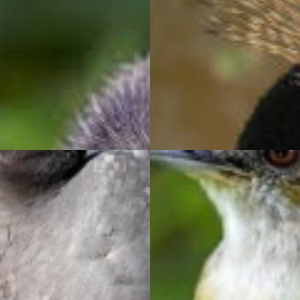

In [18]:
Image.open('/content/final_grid.png')